In [1]:
%pip install seaborn

In [12]:
# imports

import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn import tree 
from scipy.stats import zscore
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

In [13]:
data = pd.read_csv('diabetes_012_health_indicators_502Rows.csv')
df = pd.DataFrame(data)
df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,AnyHealthcare,NoDocbcCost,GenHlth,DiffWalk,Sex,Age,Education
0,0,1,1,1,40,1,0,0,0,0,1,1,0,5,1,0,9,4
1,0,0,0,0,25,1,0,0,1,0,0,0,1,3,0,0,7,6
2,0,1,1,1,28,0,0,0,0,1,0,1,1,5,1,0,9,4
3,0,1,0,1,27,0,0,0,1,1,1,1,0,2,0,0,11,3
4,0,1,1,1,24,0,0,0,1,1,1,1,0,2,0,0,11,5


In [14]:
# show missing values
missing_values = df.isnull().sum()
display(missing_values)

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
DiffWalk                0
Sex                     0
Age                     0
Education               0
dtype: int64

In [15]:
# the mean of attribute values for each diabetes case:

dmean = df.groupby('Diabetes_012').mean()
display(dmean)


,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,AnyHealthcare,NoDocbcCost,GenHlth,DiffWalk,Sex,Age,Education
Diabetes_012,,,,,,,,,,,,,,,,,
0,0.473054,0.485030,0.970060,28.131737,0.479042,0.053892,0.095808,0.598802,0.514970,0.760479,0.952096,0.113772,2.700599,0.203593,0.371257,7.742515,4.820359
1,0.622754,0.580838,0.988024,29.239521,0.329341,0.023952,0.149701,0.497006,0.502994,0.820359,0.916168,0.197605,3.185629,0.353293,0.383234,8.041916,4.610778
2,0.790419,0.616766,1.000000,30.832335,0.389222,0.047904,0.233533,0.479042,0.467066,0.712575,0.982036,0.155689,3.508982,0.425150,0.359281,9.023952,4.341317


In [16]:
# the median of attribute values for each diabetes case: 

dmedian = df.groupby('Diabetes_012').median()
display(dmedian)

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,AnyHealthcare,NoDocbcCost,GenHlth,DiffWalk,Sex,Age,Education
Diabetes_012,,,,,,,,,,,,,,,,,
0,0.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,3.0,0.0,0.0,8.0,5.0
1,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,0.0,8.0,5.0
2,1.0,1.0,1.0,29.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,4.0,0.0,0.0,9.0,4.0


In [17]:
# the variance of attribute values for each diabetes case: 

dvariance =  df.groupby('Diabetes_012').var()
display(dvariance)


,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,AnyHealthcare,NoDocbcCost,GenHlth,DiffWalk,Sex,Age,Education
Diabetes_012,,,,,,,,,,,,,,,,,
0,0.250776,0.251281,0.029219,30.970493,0.251064,0.051295,0.087151,0.241685,0.251281,0.183248,0.045884,0.101436,1.102590,0.163120,0.234832,10.011615,1.172354
1,0.236347,0.244932,0.011904,36.894091,0.222206,0.023519,0.128057,0.251497,0.251497,0.148258,0.077267,0.159512,1.019551,0.229854,0.237789,8.450040,1.636751
2,0.166655,0.237789,0.000000,43.959671,0.239160,0.045884,0.180074,0.251064,0.250415,0.206046,0.017748,0.132242,0.877931,0.245870,0.231585,4.915085,1.924969


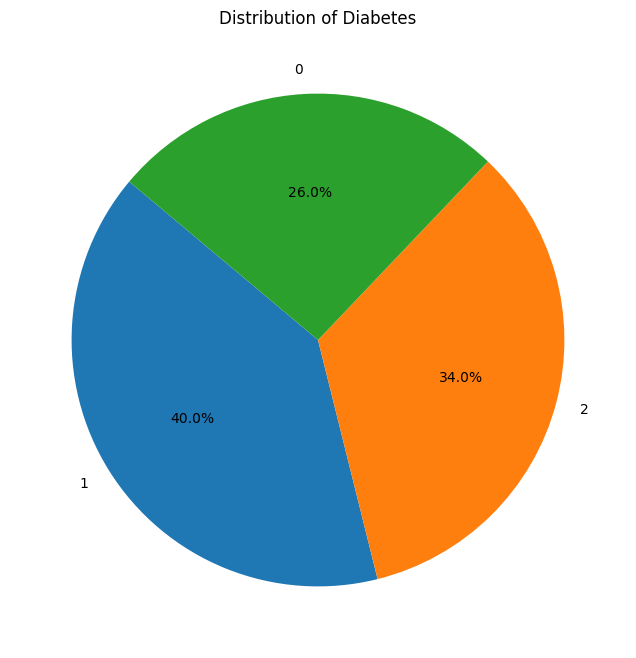

<Figure size 640x480 with 0 Axes>

In [18]:
#creat piechart 
df_sample = df.sample(n=50 , random_state =1)
Diabetes_012_freq = df_sample['Diabetes_012'].value_counts(normalize=True)*100
Diabetes_012_freq.plot.pie( autopct='%1.1f%%', figsize=(8, 8),startangle=140)
plt.title('Distribution of Diabetes')
plt.ylabel('')
plt.show()
plt.savefig('Distribution_of_Diabetes.png')

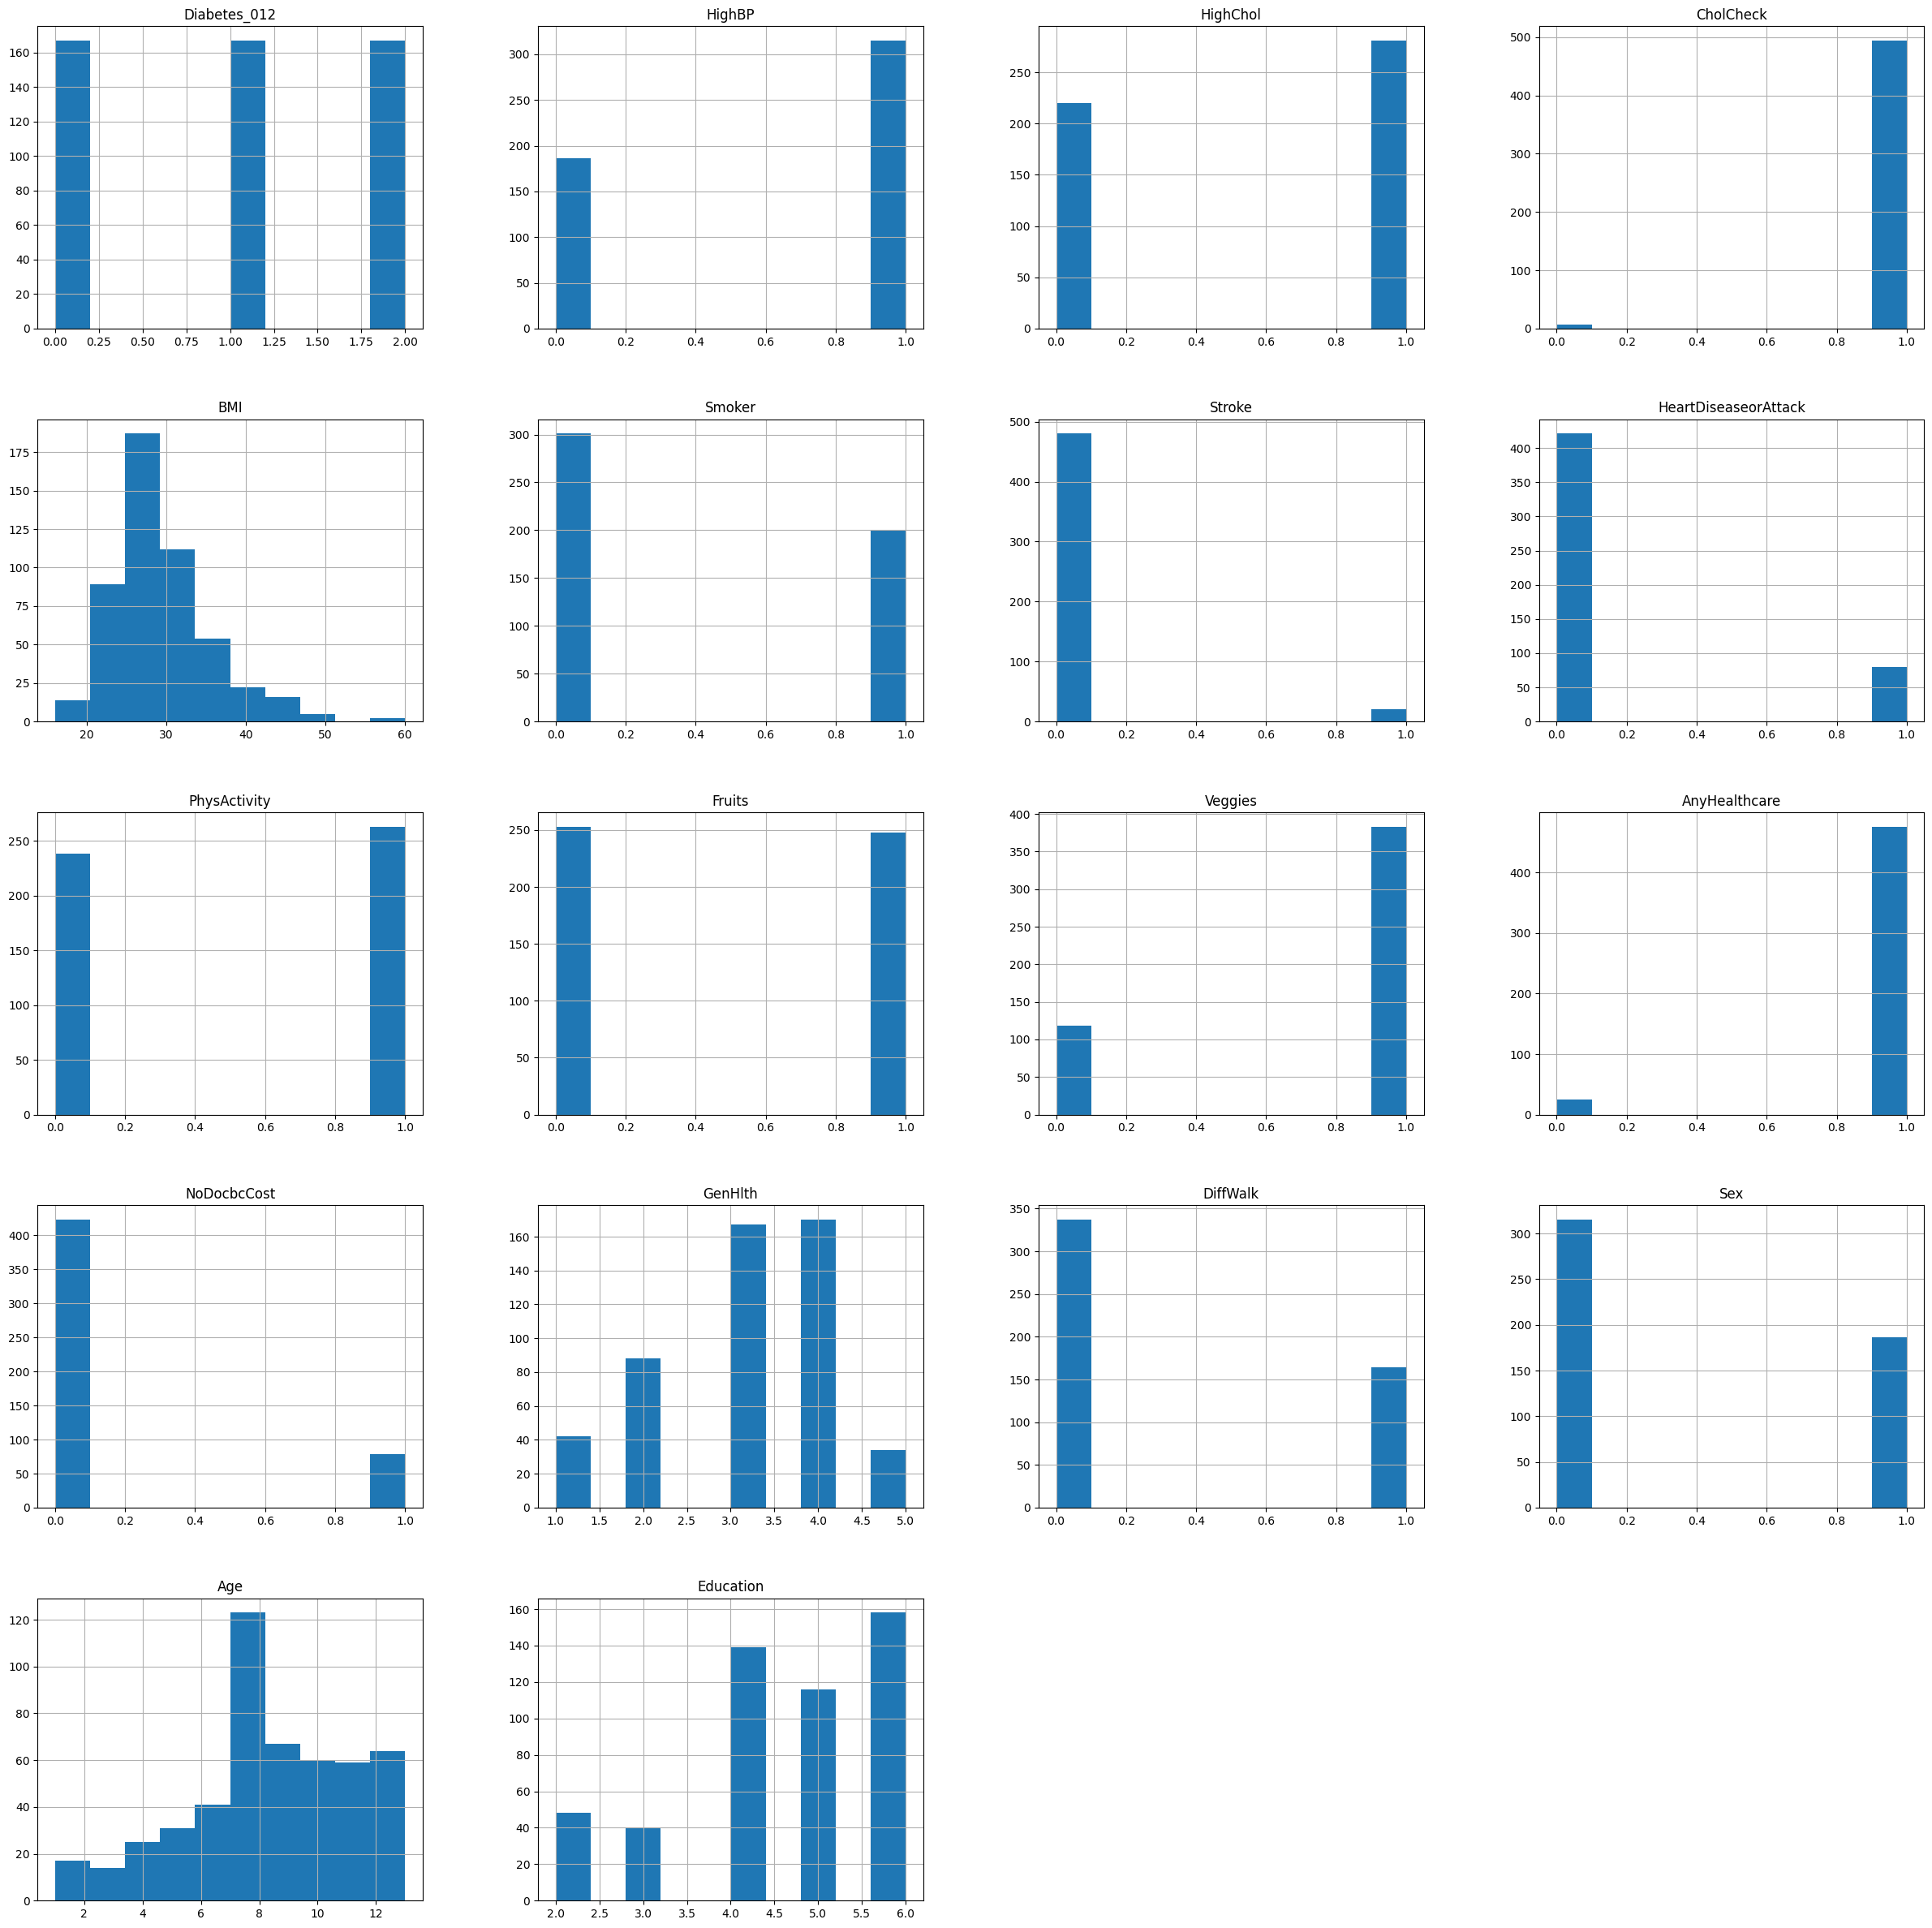

In [21]:
#create histogram
df.hist(figsize=(30,30)) 
plt.savefig('histogram_of_Diabetes.png')

In [11]:
# Create a correlation matrix
correlation_matrix = df.corr()
# Draw heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap - Diabetes dataset')
plt.show()


<class 'NameError'>: name 'df' is not defined